# WeatherPy Analysis

Observable Trends
1. The scatterplot depicting the relationship between latitude and weather temperature shows that the maximum temperature increases as cities are located closer to the equator.  
2. The percentage of cloudiness for 500+ randomly selected sample of cities in the entire world are well-dispersed regardless of the city's distance from the equator. 
3. Majority of the 500+ randomly selected cities are clustered near low wind speed (mph) and near high humidity (%). 

In [1]:
#dependencies 
import requests as rs
import json
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from citipy import citipy
import datetime
from config import api_key


#format charts with seaborn
sns.set()

In [2]:
#function to return query url for api call
def query_url(city_name):
    
    #beginning part of the url to be used for api call
    url = "http://api.openweathermap.org/data/2.5/weather?"

    #date of checking weather
    timestamp = "1529449487"
         
    #url of api call
    query_url = url + "&appid=" + api_key + "&q=" + city_name + "&units=imperial"
    
    return query_url


In [3]:
#create lists for latitude and longitude to be appended
lat = []
lon = []

#for loop to add latitude and longitude values randomly to lat and lon list
for x in range(0, 2000, 1):
    a = random.uniform(-90,90)
    b = random.uniform(-180,180)
        
    if a not in lat and b not in lon:
        lat.append(a)
        lon.append(b)

#create list of tuples of coordinate values 
coordinates = list(zip(lat, lon))
print(f'A total of {len(coordinates)} coordinate pairs were randomly generated.')

A total of 2000 coordinate pairs were randomly generated.


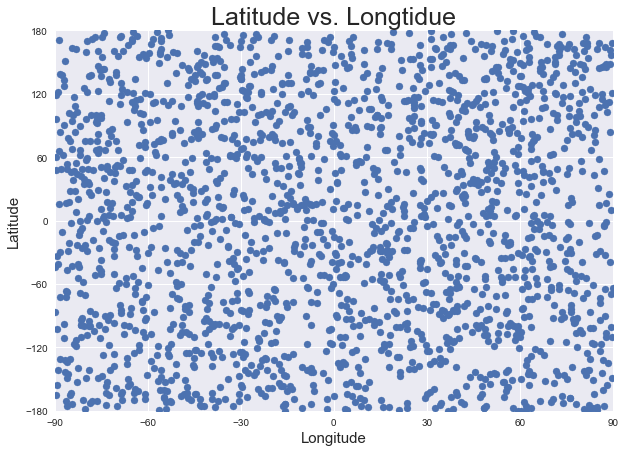

Scatter plot shows that randomly generated coordinate pairs are well-dispersed.



In [4]:
#Visually demonstrate with a scatter plot that the randomly generated coordinate pairs are uniformaly distributed.

#set figure size
plt.figure(figsize=(10,7))

#create and format scatter plot of latitude (x-axis) and longitude (y-axis)
plt.scatter(lat, lon, marker='o')
plt.xlabel("Longitude", fontsize=15)
plt.ylabel("Latitude", fontsize=15)
plt.title("Latitude vs. Longtidue", fontsize=25)
plt.xlim(-90,90)
plt.ylim(-180,180)
plt.xticks(np.arange(-90, 120, 30))
plt.yticks(np.arange(-180, 240, 60))
plt.grid(True)
plt.show()

print("Scatter plot shows that randomly generated coordinate pairs are well-dispersed.")
print("")

In [5]:
cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))
    
#convert list of city coordinates
city_name_list = [city.city_name for city in cities]
unique_city_list = pd.Series(city_name_list).unique()
print(f'From the {len(coordinates)} randomly generated coordinate pairs, {len(unique_city_list)} cities were identified near the coordinate pairs.' )

From the 2000 randomly generated coordinate pairs, 771 cities were identified near the coordinate pairs.


In [6]:
print("Beginning Data Retrieval")
print("-----------------------------------------")


#instantiate a dictionary of city dictionaries
city_dict = {}

#counters
count = 0
success = 0 
unsuccessful = 0

#collect dictionaries of city dictionaries 
for city in unique_city_list:

    count +=1


    try:
        #response from api call     
        response = rs.get(query_url(city))
        response_json = response.json()
        
        print("")
        print("Processing Record " + str(count) + " of " + str(len(unique_city_list)) + " | " + city)
        print(response.url)
        print("")

        
        #city coordinate's latitude 
        latitude = response_json['coord']['lat']
    
    #catch any response calls without any weather data
    except KeyError:
        
        
        print(f'<< Weather data not available for {city}. >>')
        print("")
        
        unsuccessful += 1

        
    else:
                
        #country city is located 
        country = response_json['sys']['country'].upper()
        
        #date collected 
        date = response_json['dt']
        
        #city coordinate's longitude 
        longitude = response_json['coord']['lon']
        
        #city name
        city_name = response_json['name'].title()
        
        #city's temperature
        temperature = response_json['main']['temp_max']
        
        #city's cloudiness
        cloudiness = response_json['clouds']['all']
        
        #city's humidity
        humidity = response_json['main']['humidity']
        
        #wind speed in city
        wind_speed = response_json['wind']['speed']
    
        #add a dictionary of a city where the city is the key
        #collected elements of weather as values
        city_dict[city] = [country, date, latitude, longitude, temperature, cloudiness, humidity, wind_speed]
        
        success += 1

print("-----------------------------------------")
print("")
print(f'From the list of {len(unique_city_list)} identified cities, weather data for {success} cities were successfully retrieved.')

Beginning Data Retrieval
-----------------------------------------

Processing Record 1 of 771 | oktyabrskiy
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=oktyabrskiy&units=imperial


Processing Record 2 of 771 | punta arenas
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=punta%20arenas&units=imperial


Processing Record 3 of 771 | hokitika
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=hokitika&units=imperial


Processing Record 4 of 771 | mataura
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=mataura&units=imperial


Processing Record 5 of 771 | halifax
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=halifax&units=imperial


Processing Record 6 of 771 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=ponta%20do%20sol&units=i


Processing Record 52 of 771 | muros
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=muros&units=imperial


Processing Record 53 of 771 | mabaruma
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=mabaruma&units=imperial


Processing Record 54 of 771 | carnarvon
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=carnarvon&units=imperial


Processing Record 55 of 771 | khatanga
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=khatanga&units=imperial


Processing Record 56 of 771 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=port%20elizabeth&units=imperial


Processing Record 57 of 771 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=saint-philippe&units=imperial


Processing Record 58 of 771 | geraldton
http://api.op


Processing Record 105 of 771 | pevek
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=pevek&units=imperial


Processing Record 106 of 771 | port keats
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=port%20keats&units=imperial


Processing Record 107 of 771 | ulyanovo
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=ulyanovo&units=imperial

<< Weather data not available for ulyanovo. >>


Processing Record 108 of 771 | chuy
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=chuy&units=imperial


Processing Record 109 of 771 | uvat
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=uvat&units=imperial


Processing Record 110 of 771 | srednekolymsk
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=srednekolymsk&units=imperial


Processing Record 111 of 77


Processing Record 156 of 771 | vestmanna
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=vestmanna&units=imperial


Processing Record 157 of 771 | moron
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=moron&units=imperial


Processing Record 158 of 771 | marcona
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=marcona&units=imperial

<< Weather data not available for marcona. >>


Processing Record 159 of 771 | yagodnoye
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=yagodnoye&units=imperial


Processing Record 160 of 771 | muravlenko
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=muravlenko&units=imperial


Processing Record 161 of 771 | shaunavon
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=shaunavon&units=imperial


Processing Record 16


Processing Record 207 of 771 | lorengau
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=lorengau&units=imperial


Processing Record 208 of 771 | deputatskiy
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=deputatskiy&units=imperial


Processing Record 209 of 771 | liverpool
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=liverpool&units=imperial


Processing Record 210 of 771 | huarmey
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=huarmey&units=imperial


Processing Record 211 of 771 | almaznyy
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=almaznyy&units=imperial


Processing Record 212 of 771 | catamarca
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=catamarca&units=imperial

<< Weather data not available for catamarca. >>


Processing R


Processing Record 257 of 771 | porto velho
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=porto%20velho&units=imperial


Processing Record 258 of 771 | nome
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=nome&units=imperial


Processing Record 259 of 771 | tommot
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=tommot&units=imperial


Processing Record 260 of 771 | ixtapa
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=ixtapa&units=imperial


Processing Record 261 of 771 | port blair
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=port%20blair&units=imperial


Processing Record 262 of 771 | batagay-alyta
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=batagay-alyta&units=imperial


Processing Record 263 of 771 | port lincoln
http://api.openwe


Processing Record 309 of 771 | ornskoldsvik
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=ornskoldsvik&units=imperial


Processing Record 310 of 771 | mergui
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=mergui&units=imperial

<< Weather data not available for mergui. >>


Processing Record 311 of 771 | lompoc
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=lompoc&units=imperial


Processing Record 312 of 771 | paracuaro
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=paracuaro&units=imperial


Processing Record 313 of 771 | faanui
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=faanui&units=imperial


Processing Record 314 of 771 | wau
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=wau&units=imperial

<< Weather data not available for wa


Processing Record 360 of 771 | eenhana
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=eenhana&units=imperial


Processing Record 361 of 771 | ambon
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=ambon&units=imperial


Processing Record 362 of 771 | antalaha
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=antalaha&units=imperial


Processing Record 363 of 771 | grand river south east
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=grand%20river%20south%20east&units=imperial

<< Weather data not available for grand river south east. >>


Processing Record 364 of 771 | namatanai
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=namatanai&units=imperial


Processing Record 365 of 771 | college
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=colleg


Processing Record 411 of 771 | kuybysheve
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=kuybysheve&units=imperial


Processing Record 412 of 771 | fort nelson
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=fort%20nelson&units=imperial


Processing Record 413 of 771 | alekseyevskoye
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=alekseyevskoye&units=imperial


Processing Record 414 of 771 | beloha
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=beloha&units=imperial


Processing Record 415 of 771 | vaitape
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=vaitape&units=imperial


Processing Record 416 of 771 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=severo-yeniseyskiy&units=imperial


Processing Record 417 of 771 | 


Processing Record 462 of 771 | agadez
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=agadez&units=imperial


Processing Record 463 of 771 | ihosy
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=ihosy&units=imperial


Processing Record 464 of 771 | zolotinka
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=zolotinka&units=imperial

<< Weather data not available for zolotinka. >>


Processing Record 465 of 771 | altamira
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=altamira&units=imperial


Processing Record 466 of 771 | raudeberg
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=raudeberg&units=imperial


Processing Record 467 of 771 | doha
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=doha&units=imperial


Processing Record 468 of 771 | she


Processing Record 513 of 771 | oxbow
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=oxbow&units=imperial


Processing Record 514 of 771 | blairmore
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=blairmore&units=imperial


Processing Record 515 of 771 | le port
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=le%20port&units=imperial


Processing Record 516 of 771 | burica
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=burica&units=imperial

<< Weather data not available for burica. >>


Processing Record 517 of 771 | milkovo
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=milkovo&units=imperial


Processing Record 518 of 771 | darhan
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=darhan&units=imperial


Processing Record 519 of 771 | shingu


Processing Record 566 of 771 | najran
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=najran&units=imperial


Processing Record 567 of 771 | kiunga
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=kiunga&units=imperial


Processing Record 568 of 771 | carauari
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=carauari&units=imperial


Processing Record 569 of 771 | umtata
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=umtata&units=imperial


Processing Record 570 of 771 | camabatela
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=camabatela&units=imperial


Processing Record 571 of 771 | camacha
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=camacha&units=imperial


Processing Record 572 of 771 | kabale
http://api.openweathermap.org/data/2.5/we


Processing Record 618 of 771 | tongren
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=tongren&units=imperial


Processing Record 619 of 771 | the valley
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=the%20valley&units=imperial


Processing Record 620 of 771 | kapit
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=kapit&units=imperial


Processing Record 621 of 771 | rio grande
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=rio%20grande&units=imperial


Processing Record 622 of 771 | markova
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=markova&units=imperial


Processing Record 623 of 771 | muyezerskiy
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=muyezerskiy&units=imperial


Processing Record 624 of 771 | chumikan
http://api.openweathe


Processing Record 670 of 771 | prainha
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=prainha&units=imperial


Processing Record 671 of 771 | oktyabrskoye
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=oktyabrskoye&units=imperial


Processing Record 672 of 771 | safwah
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=safwah&units=imperial

<< Weather data not available for safwah. >>


Processing Record 673 of 771 | athabasca
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=athabasca&units=imperial


Processing Record 674 of 771 | labuhan
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=labuhan&units=imperial


Processing Record 675 of 771 | sangmelima
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=sangmelima&units=imperial


Processing Record


Processing Record 722 of 771 | araouane
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=araouane&units=imperial


Processing Record 723 of 771 | crossville
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=crossville&units=imperial


Processing Record 724 of 771 | hovd
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=hovd&units=imperial


Processing Record 725 of 771 | batavia
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=batavia&units=imperial


Processing Record 726 of 771 | deniliquin
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=deniliquin&units=imperial


Processing Record 727 of 771 | bay roberts
http://api.openweathermap.org/data/2.5/weather?&appid=4bb8300ea040f003010cb9741f3b2c61&q=bay%20roberts&units=imperial


Processing Record 728 of 771 | kuybyshevo
http://api.openweathe

In [7]:
#convert unix time to readable time 
readable_date = datetime.datetime.fromtimestamp(int(date)).strftime('%m/%d/%Y %H:%M:%S')
date_collected = readable_date[:10]

print(f'Weather data collected on {date_collected}.')

Weather data collected on 06/23/2018.


In [8]:
#create dataframe of cities and their weather information 
city_df = pd.DataFrame(city_dict)

#renamecolumn names to appropriately describe column data values
city_df = city_df.rename(index= {0: "Country", 1:"Date (Unix Timestamp)", 2:"Latitude", 3:"Longitude", 4:"Max Temperature(F)", 5:"Cloudiness(%)", 
                                 6:"Humidity(%)", 7:"Wind Speed(mph)"})

#transpose dataframe to get columns (city names) as indexes: 
city_df = city_df.T

#give index array a name
city_df.index.name = "City"

#save data retrieved into csv file
city_df.to_csv("cities_data.csv")

#display top 5 rows of the dataframe
city_df.head()


,Country,Date (Unix Timestamp),Latitude,Longitude,Max Temperature(F),Cloudiness(%),Humidity(%),Wind Speed(mph)
City,,,,,,,,
aberdeen,US,1529805180,45.47,-98.49,68,90,94,4.7
abnub,EG,1529805600,27.27,31.15,78.8,0,54,20.8
acari,BR,1529809248,-6.44,-36.64,67.9,8,87,11.34
adrar,DZ,1529805600,27.87,-0.29,82.4,0,18,8.05
adwa,ET,1529809337,14.16,38.9,54.04,48,95,2.51


In [19]:
#function to create scatter plots
def constructScatter(string1, string2): 
    #set scatter plot figure size
    plt.figure(figsize=(15,10))
    #create scatter plot by assigning x-axis and y-axis
    plt.scatter(city_df[string1], city_df[string2], color='green', 
                s=50, linewidth=1, edgecolors='black', alpha=1)

    
    #add title to scatter plot
    plt.title(string2 + " vs " + string1 + "  :   " + date_collected + " ", fontsize=25, pad=20)
    #add gridlines to scatter plot
    plt.grid(True)
    #add labels to x-axis and y-axis
    plt.xlabel(string1, fontsize=20)
    plt.ylabel(string2, fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    



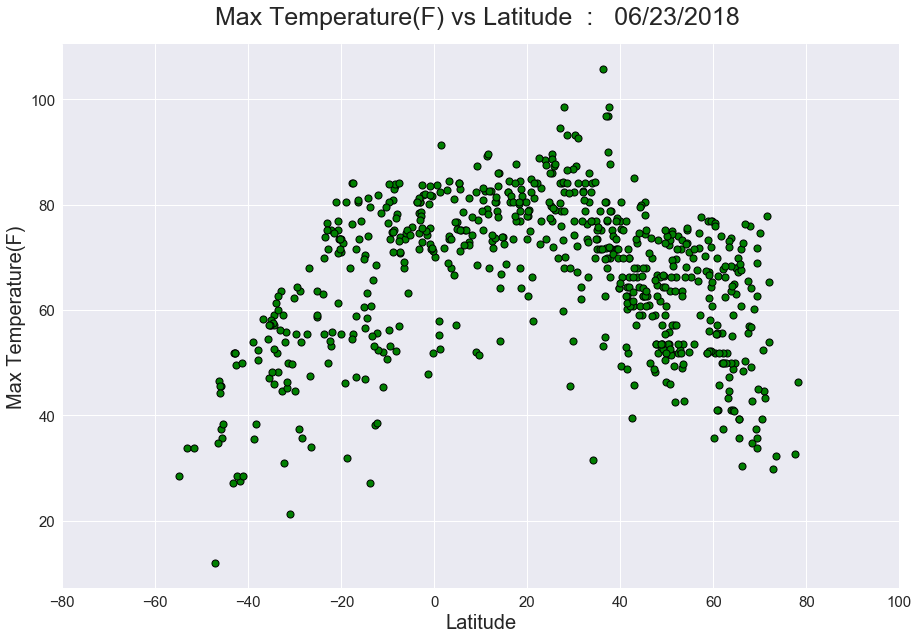

In [20]:
#creating scatter plot for latitude vs. Max Temperature (F)
constructScatter("Latitude", "Max Temperature(F)")

#setting x and y limits for scatter plot
plt.xlim(-80, 100)

#save scatter plot
plt.savefig("Latitude_Temperature.png")
plt.show()


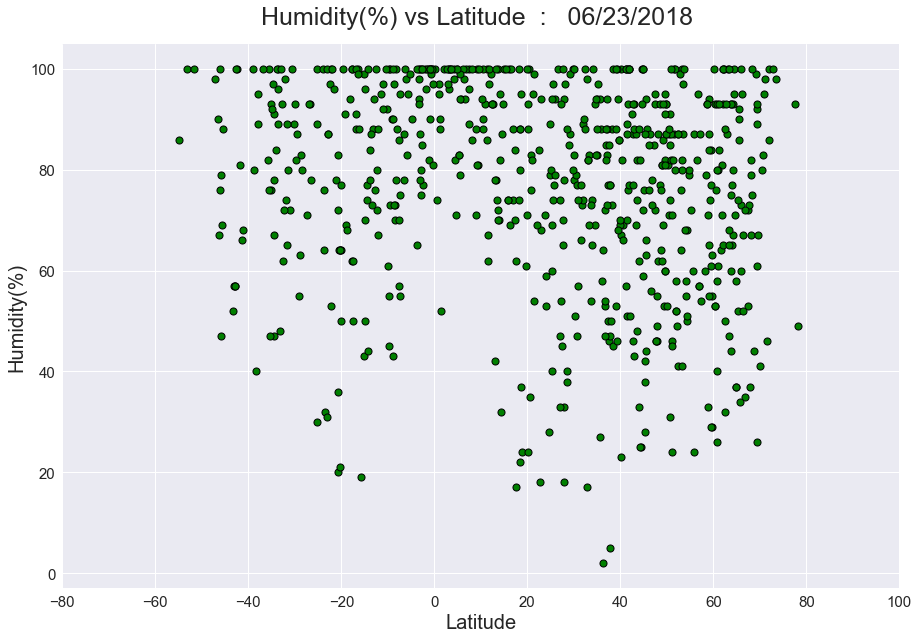

In [15]:
#creating scatter plot for latitude vs. Humidity (%)
constructScatter("Latitude", "Humidity(%)")

#setting x and y limits for scatter plot
plt.xlim(-80, 100)

#save scatter plot
plt.savefig("Latitude_Humidity.png")
plt.show()


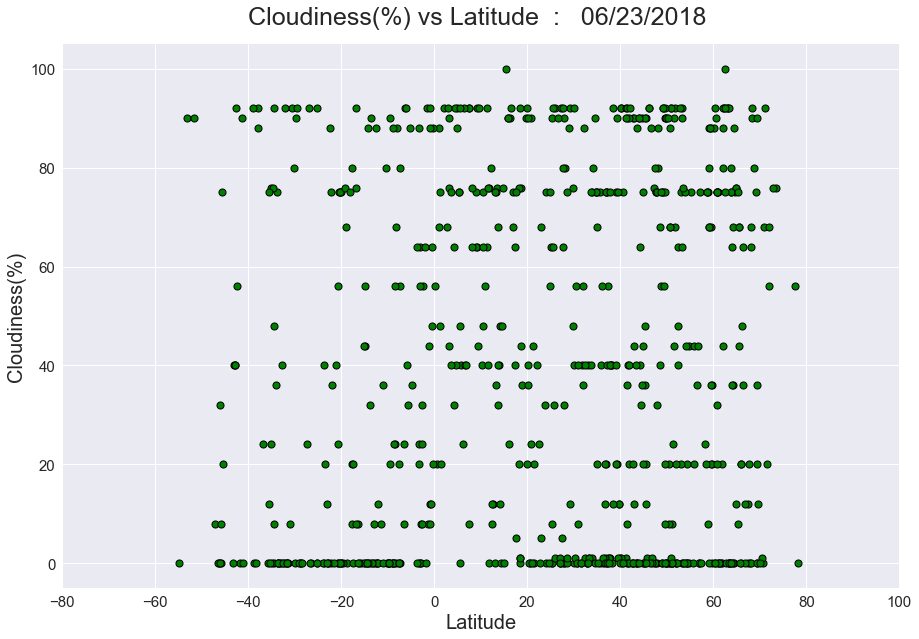

In [21]:
#creating scatter plot for latitude vs. Cloudiness (%)
constructScatter("Latitude", "Cloudiness(%)")

#setting x and y limits for scatter plot
plt.xlim(-80, 100)

#save scatter plot
plt.savefig("Latitude_Cloudiness.png")
plt.show()


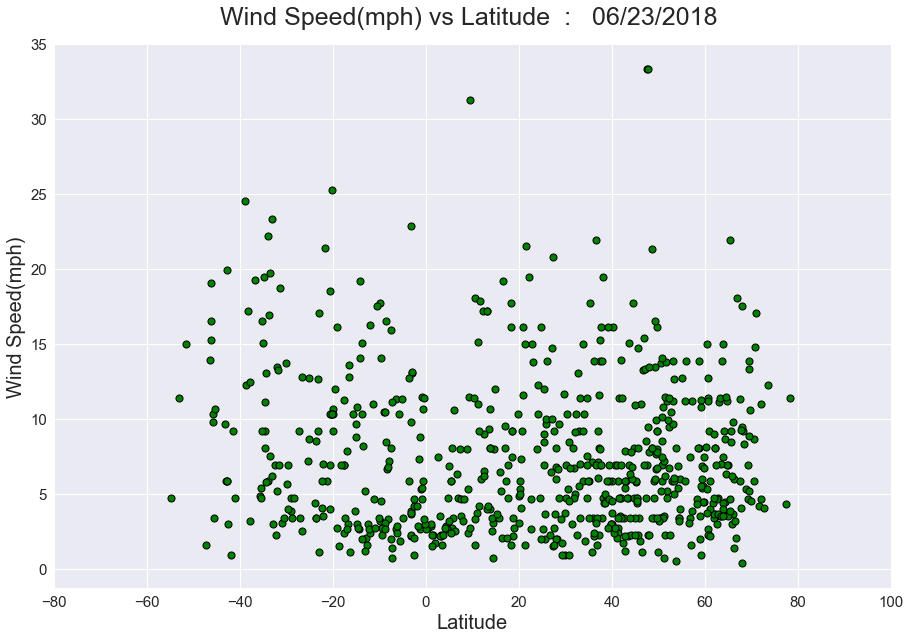

In [23]:
#creating scatter plot for latitude vs. Wind Speed (mph)
constructScatter("Latitude", "Wind Speed(mph)")

#setting x and y limits for scatter plot
plt.xlim(-80, 100)

#save scatter plot
plt.savefig("Latitude_WindSpeed.png")
plt.show()

